### Устанвока.

In [5]:
%pip install pandas numpy matplotlib seaborn
%pip install phik


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Импорты библиотек.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

### Импорт данных.

In [7]:
df = pd.read_csv('/Users/polinamarina/Documents/praktika/ObesityDataSet.csv') 

### Сравнительный анализ данных.

([<matplotlib.axis.XTick at 0x1154eaba0>,
 [Text(0, 0, 'Нет'), Text(1, 0, 'Да')])

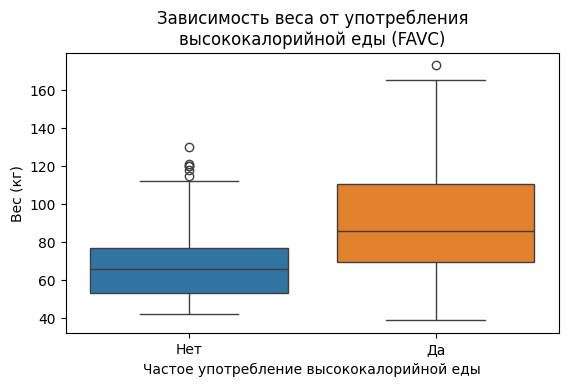

In [8]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='FAVC', y='Weight', hue='FAVC', legend=False)
plt.title('Зависимость веса от употребления\nвысококалорийной еды (FAVC)')
plt.xlabel('Частое употребление высококалорийной еды')
plt.ylabel('Вес (кг)')
plt.xticks([0, 1], ['Нет', 'Да'])

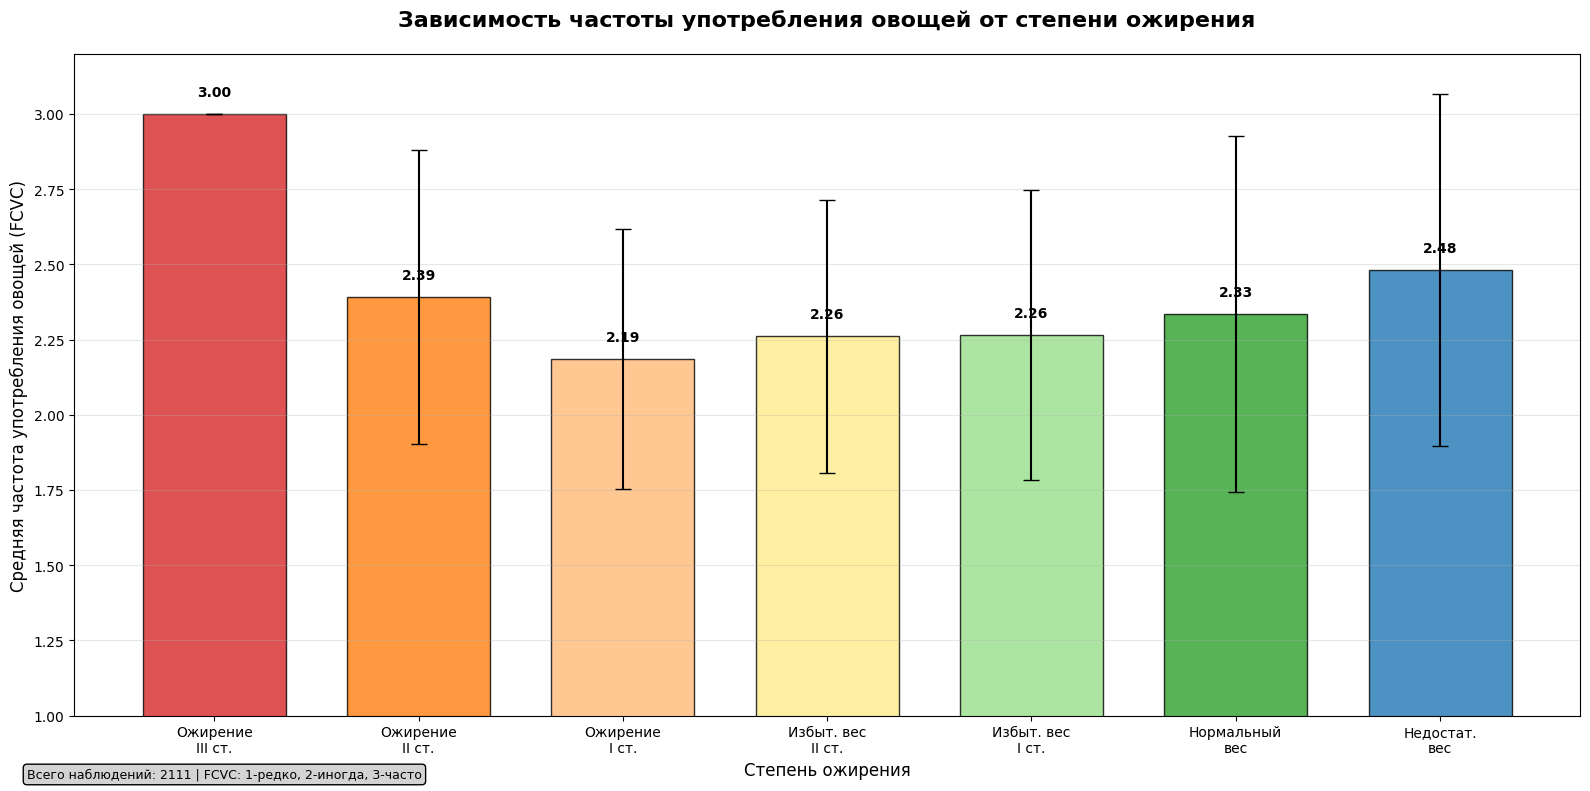

In [ ]:
plt.figure(figsize=(16, 8))
avg_fcvc_by_obesity = df.groupby('NObeyesdad')['FCVC'].mean()
std_fcvc_by_obesity = df.groupby('NObeyesdad')['FCVC'].std()
counts_by_obesity = df.groupby('NObeyesdad')['FCVC'].count()
obesity_order = [
    'Obesity_Type_III',
    'Obesity_Type_II',
    'Obesity_Type_I',
    'Overweight_Level_II', 
    'Overweight_Level_I',
    'Normal_Weight',
    'Insufficient_Weight'
]

avg_fcvc_ordered = avg_fcvc_by_obesity.reindex(obesity_order)
std_fcvc_ordered = std_fcvc_by_obesity.reindex(obesity_order)
counts_ordered = counts_by_obesity.reindex(obesity_order)

russian_translation = {
    'Insufficient_Weight': 'Недостат.\nвес',
    'Normal_Weight': 'Нормальный\nвес', 
    'Overweight_Level_I': 'Избыт. вес\nI ст.',
    'Overweight_Level_II': 'Избыт. вес\nII ст.',
    'Obesity_Type_I': 'Ожирение\nI ст.',
    'Obesity_Type_II': 'Ожирение\nII ст.',
    'Obesity_Type_III': 'Ожирение\nIII ст.'
}

colors = ['#d62728', '#ff7f0e', '#ffbb78', '#ffec8b', '#98df8a', '#2ca02c', '#1f77b4']
bars = plt.bar(range(len(avg_fcvc_ordered)), avg_fcvc_ordered, 
               yerr=std_fcvc_ordered, capsize=6, alpha=0.8, 
               color=colors, edgecolor='black', linewidth=1, width=0.7)

plt.title('Зависимость частоты употребления овощей от степени ожирения', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Средняя частота употребления овощей (FCVC)', fontsize=12)
plt.xlabel('Степень ожирения', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

for i, (bar, value, count, std) in enumerate(zip(bars, avg_fcvc_ordered, counts_ordered, std_fcvc_ordered)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

x_labels = [russian_translation[obesity] for obesity in obesity_order]
plt.xticks(range(len(avg_fcvc_ordered)), x_labels, fontsize=10, rotation=0, ha='center')

plt.ylim(1.0, 3.2)

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.02, 0.02, f'Всего наблюдений: {len(df)} | FCVC: 1-редко, 2-иногда, 3-часто', 
           fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.tight_layout()
plt.show()

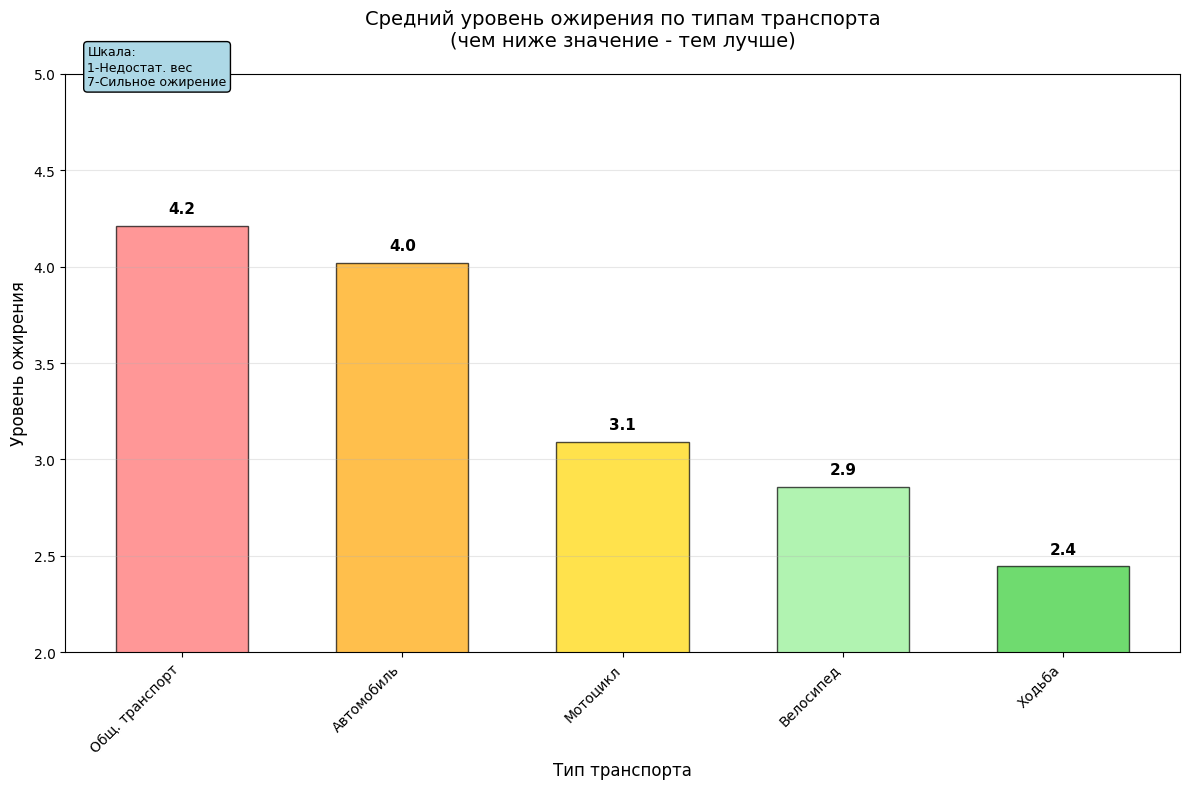

In [ ]:
plt.figure(figsize=(12, 8))  

obesity_num = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 2,
    'Overweight_Level_I': 3, 
    'Overweight_Level_II': 4,
    'Obesity_Type_I': 5,
    'Obesity_Type_II': 6,
    'Obesity_Type_III': 7
}

df['obesity_level'] = df['NObeyesdad'].map(obesity_num)

transport_groups = df.groupby('MTRANS')['obesity_level'].mean()

transport_names = {
    'Automobile': 'Автомобиль',
    'Bike': 'Велосипед', 
    'Motorbike': 'Мотоцикл',
    'Public_Transportation': 'Общ. транспорт',
    'Walking': 'Ходьба'
}

transport_groups.index = [transport_names[x] for x in transport_groups.index]

transport_groups = transport_groups.sort_values(ascending=False)

bars = plt.bar(transport_groups.index, transport_groups.values, 
        color=['#ff6b6b', '#ffa500', '#ffd700', '#90ee90', '#32cd32'],
        alpha=0.7, edgecolor='black', width=0.6)

plt.title('Средний уровень ожирения по типам транспорта\n(чем ниже значение - тем лучше)', 
          fontsize=14, pad=20)
plt.ylabel('Уровень ожирения', fontsize=12)
plt.xlabel('Тип транспорта', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.ylim(2, 5) 
plt.subplots_adjust(bottom=0.15, left=0.1, right=0.95, top=0.9)

for i, (bar, value) in enumerate(zip(bars, transport_groups.values)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.05, f'{value:.1f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

plt.text(0.02, 0.98, 'Шкала:\n1-Недостат. вес\n7-Сильное ожирение', 
         transform=plt.gca().transAxes, fontsize=9,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.tight_layout()
plt.show()

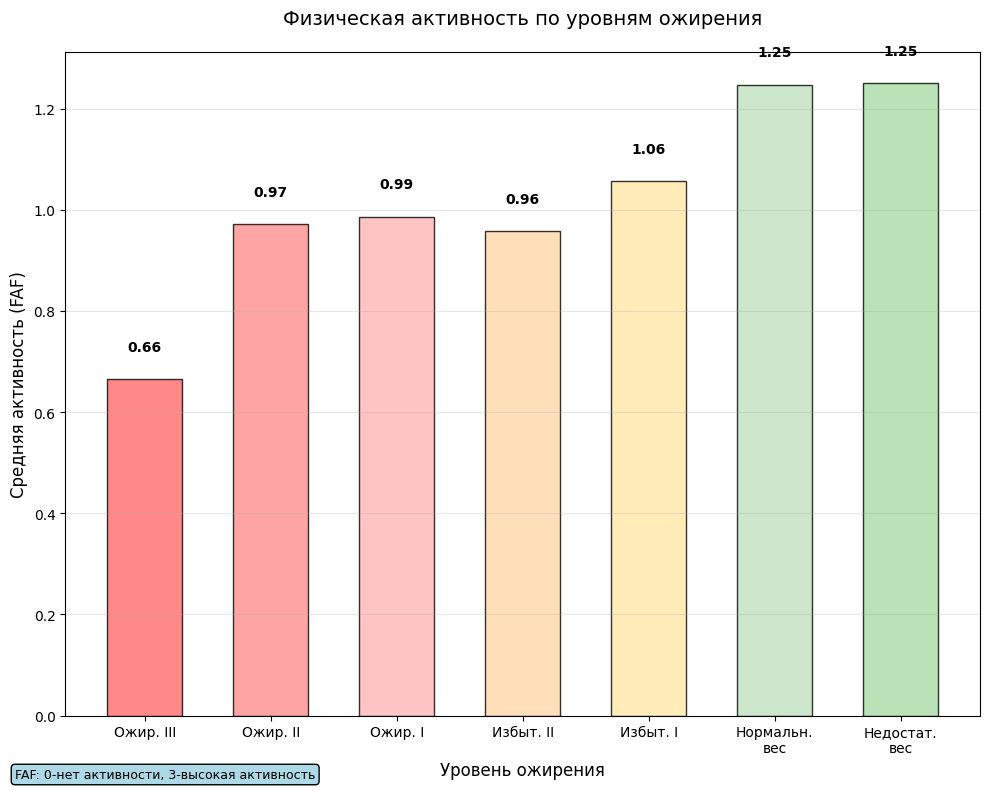

In [ ]:
activity_by_obesity = df.groupby('NObeyesdad')['FAF'].mean()

obesity_names = {
    'Insufficient_Weight': 'Недостат.\nвес',
    'Normal_Weight': 'Нормальн.\nвес', 
    'Overweight_Level_I': 'Избыт. I',
    'Overweight_Level_II': 'Избыт. II',
    'Obesity_Type_I': 'Ожир. I',
    'Obesity_Type_II': 'Ожир. II',
    'Obesity_Type_III': 'Ожир. III'
}

activity_by_obesity.index = [obesity_names[x] for x in activity_by_obesity.index]

order = [
    'Ожир. III',
    'Ожир. II',
    'Ожир. I',
    'Избыт. II',
    'Избыт. I',
    'Нормальн.\nвес',
    'Недостат.\nвес'
]
activity_by_obesity = activity_by_obesity.reindex(order)

plt.figure(figsize=(10, 8))  

bars = plt.bar(activity_by_obesity.index, activity_by_obesity.values,
              color=['#ff6b6b', '#ff8e8e', '#ffb6b6', '#ffd8a8', '#ffe8a8', '#c1e1c1', '#a8dba8'],
              alpha=0.8, edgecolor='black', width=0.6)

plt.title('Физическая активность по уровням ожирения', fontsize=14, pad=20)
plt.ylabel('Средняя активность (FAF)', fontsize=12)
plt.xlabel('Уровень ожирения', fontsize=12)
plt.xticks(rotation=0, ha='center') 

for bar, value in zip(bars, activity_by_obesity.values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.05, f'{value:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

plt.figtext(0.02, 0.02, 'FAF: 0-нет активности, 3-высокая активность', 
           fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.subplots_adjust(bottom=0.15, top=0.9)

plt.tight_layout()
plt.show()

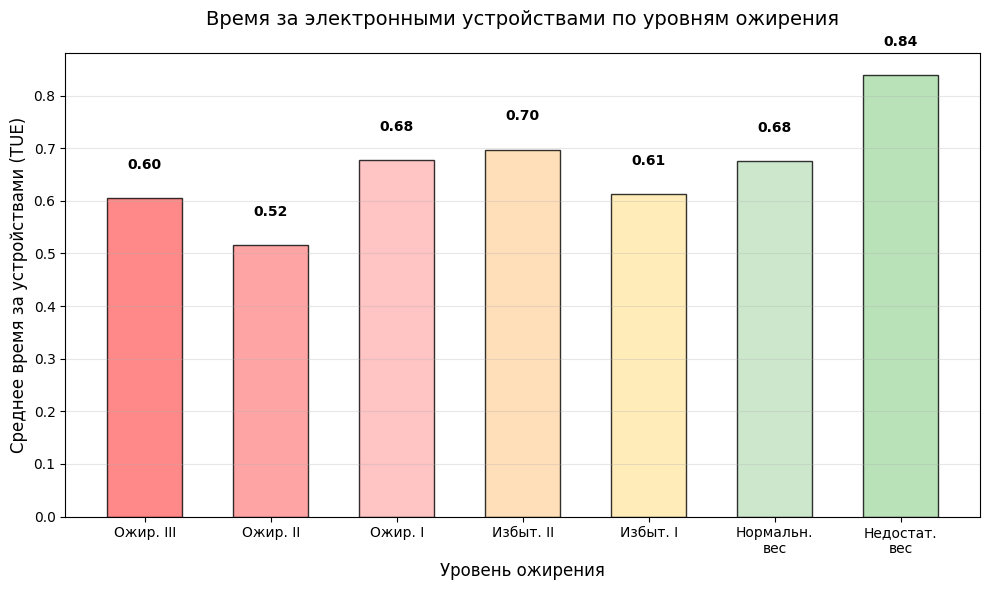

In [ ]:

obesity_num = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 2,
    'Overweight_Level_I': 3, 
    'Overweight_Level_II': 4,
    'Obesity_Type_I': 5,
    'Obesity_Type_II': 6,
    'Obesity_Type_III': 7
}

df['obesity_level'] = df['NObeyesdad'].map(obesity_num)

time_by_obesity = df.groupby('NObeyesdad')['TUE'].mean()

obesity_names = {
    'Insufficient_Weight': 'Недостат.\nвес',
    'Normal_Weight': 'Нормальн.\nвес', 
    'Overweight_Level_I': 'Избыт. I',
    'Overweight_Level_II': 'Избыт. II',
    'Obesity_Type_I': 'Ожир. I',
    'Obesity_Type_II': 'Ожир. II',
    'Obesity_Type_III': 'Ожир. III'
}

time_by_obesity.index = [obesity_names[x] for x in time_by_obesity.index]

order = [
    'Ожир. III',
    'Ожир. II',
    'Ожир. I',
    'Избыт. II',
    'Избыт. I',
    'Нормальн.\nвес',
    'Недостат.\nвес'
]
time_by_obesity = time_by_obesity.reindex(order)

plt.figure(figsize=(10, 6))

bars = plt.bar(time_by_obesity.index, time_by_obesity.values,
              color=['#ff6b6b', '#ff8e8e', '#ffb6b6', '#ffd8a8', '#ffe8a8', '#c1e1c1', '#a8dba8'],
              alpha=0.8, edgecolor='black', width=0.6)

plt.title('Время за электронными устройствами по уровням ожирения', fontsize=14, pad=20)
plt.ylabel('Среднее время за устройствами (TUE)', fontsize=12)
plt.xlabel('Уровень ожирения', fontsize=12)
plt.xticks(rotation=0, ha='center')

for bar, value in zip(bars, time_by_obesity.values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.05, f'{value:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

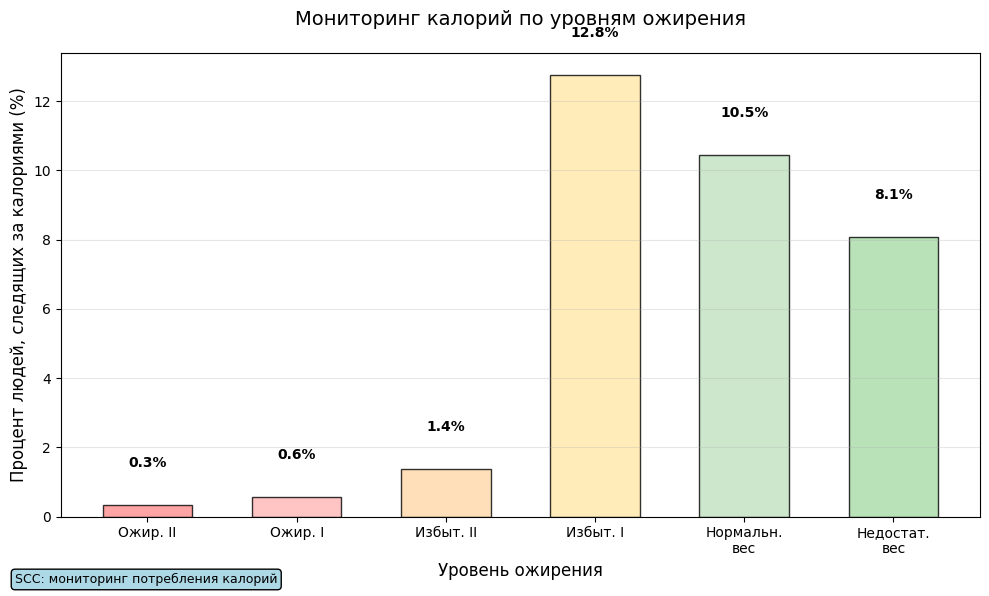

In [ ]:
calorie_monitoring = df.groupby('NObeyesdad')['SCC'].value_counts(normalize=True).unstack()

if 'yes' in calorie_monitoring.columns:
    monitoring_percent = calorie_monitoring['yes'] * 100
else:
    monitoring_percent = df.groupby('NObeyesdad')['SCC'].mean() * 100

obesity_names = {
    'Insufficient_Weight': 'Недостат.\nвес',
    'Normal_Weight': 'Нормальн.\nвес', 
    'Overweight_Level_I': 'Избыт. I',
    'Overweight_Level_II': 'Избыт. II',
    'Obesity_Type_I': 'Ожир. I',
    'Obesity_Type_II': 'Ожир. II',
    'Obesity_Type_III': 'Ожир. III'
}

monitoring_percent.index = [obesity_names[x] for x in monitoring_percent.index]

order = [
    'Ожир. III',
    'Ожир. II',
    'Ожир. I',
    'Избыт. II',
    'Избыт. I',
    'Нормальн.\nвес',
    'Недостат.\nвес'
]
monitoring_percent = monitoring_percent.reindex(order)

plt.figure(figsize=(10, 6))

bars = plt.bar(monitoring_percent.index, monitoring_percent.values,
              color=['#ff6b6b', '#ff8e8e', '#ffb6b6', '#ffd8a8', '#ffe8a8', '#c1e1c1', '#a8dba8'],
              alpha=0.8, edgecolor='black', width=0.6)

plt.title('Мониторинг калорий по уровням ожирения', fontsize=14, pad=20)
plt.ylabel('Процент людей, следящих за калориями (%)', fontsize=12)
plt.xlabel('Уровень ожирения', fontsize=12)
plt.xticks(rotation=0, ha='center')

for bar, value in zip(bars, monitoring_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, f'{value:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

plt.figtext(0.02, 0.02, 'SCC: мониторинг потребления калорий', 
           fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

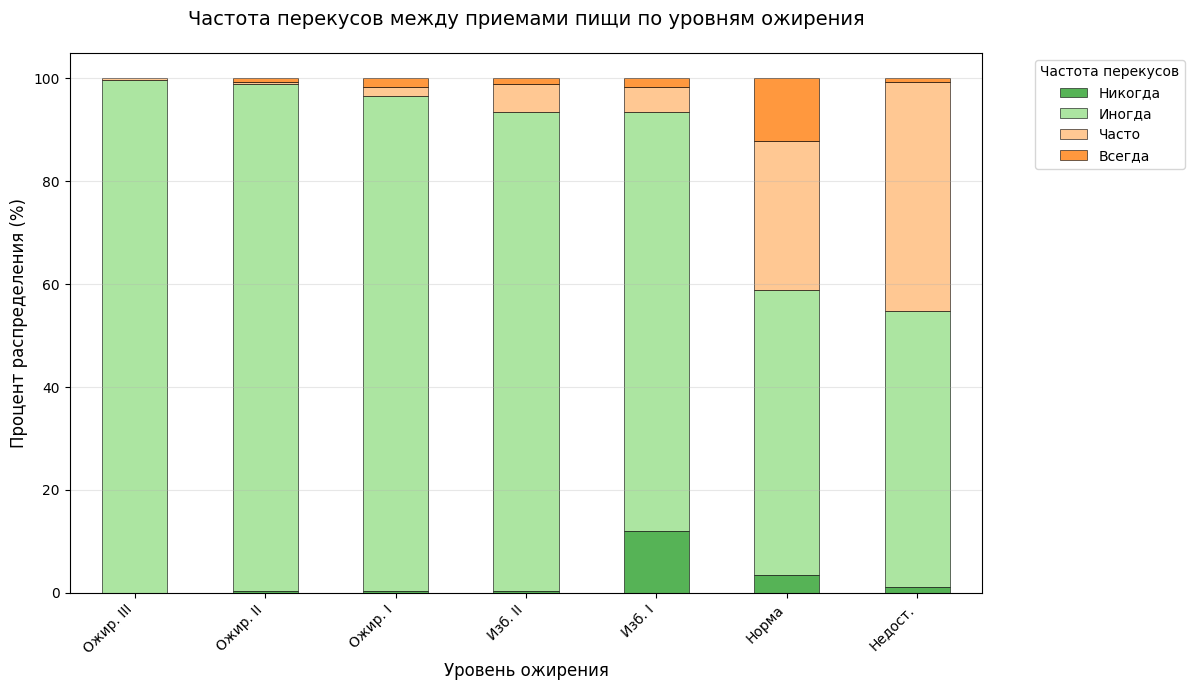

In [ ]:

caec_by_obesity = df.groupby('NObeyesdad')['CAEC'].value_counts(normalize=True).unstack() * 100

# Сокращенные русские названия
obesity_names = {
    'Insufficient_Weight': 'Недост.',
    'Normal_Weight': 'Норма', 
    'Overweight_Level_I': 'Изб. I',
    'Overweight_Level_II': 'Изб. II',
    'Obesity_Type_I': 'Ожир. I',
    'Obesity_Type_II': 'Ожир. II',
    'Obesity_Type_III': 'Ожир. III'
}

caec_names = {
    'no': 'Никогда',
    'Sometimes': 'Иногда',
    'Frequently': 'Часто',
    'Always': 'Всегда'
}

caec_by_obesity.index = [obesity_names[x] for x in caec_by_obesity.index]
caec_by_obesity.columns = [caec_names.get(col, col) for col in caec_by_obesity.columns]

order = [
    'Ожир. III',
    'Ожир. II',
    'Ожир. I',
    'Изб. II',
    'Изб. I',
    'Норма',
    'Недост.'
]
caec_by_obesity = caec_by_obesity.reindex(order)

caec_order = ['Никогда', 'Иногда', 'Часто', 'Всегда']
caec_by_obesity = caec_by_obesity[caec_order]

plt.figure(figsize=(12, 7))

colors = ['#2ca02c', '#98df8a', '#ffbb78', '#ff7f0e'] 

ax = caec_by_obesity.plot(kind='bar', stacked=True, 
                         color=colors, figsize=(12, 7),
                         alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('Частота перекусов между приемами пищи по уровням ожирения', fontsize=14, pad=20)
plt.ylabel('Процент распределения (%)', fontsize=12)
plt.xlabel('Уровень ожирения', fontsize=12)
plt.xticks(rotation=45, ha='right')

total_counts = df.groupby('NObeyesdad').size()
total_counts.index = [obesity_names[x] for x in total_counts.index]
total_counts = total_counts.reindex(order)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           title='Частота перекусов', fontsize=10)

plt.grid(True, alpha=0.3, axis='y')

plt.subplots_adjust(bottom=0.15, right=0.8)

plt.tight_layout()
plt.show()

### Корреляция фикато.

Расчет матрицы Phi_k...
interval columns not set, guessing: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


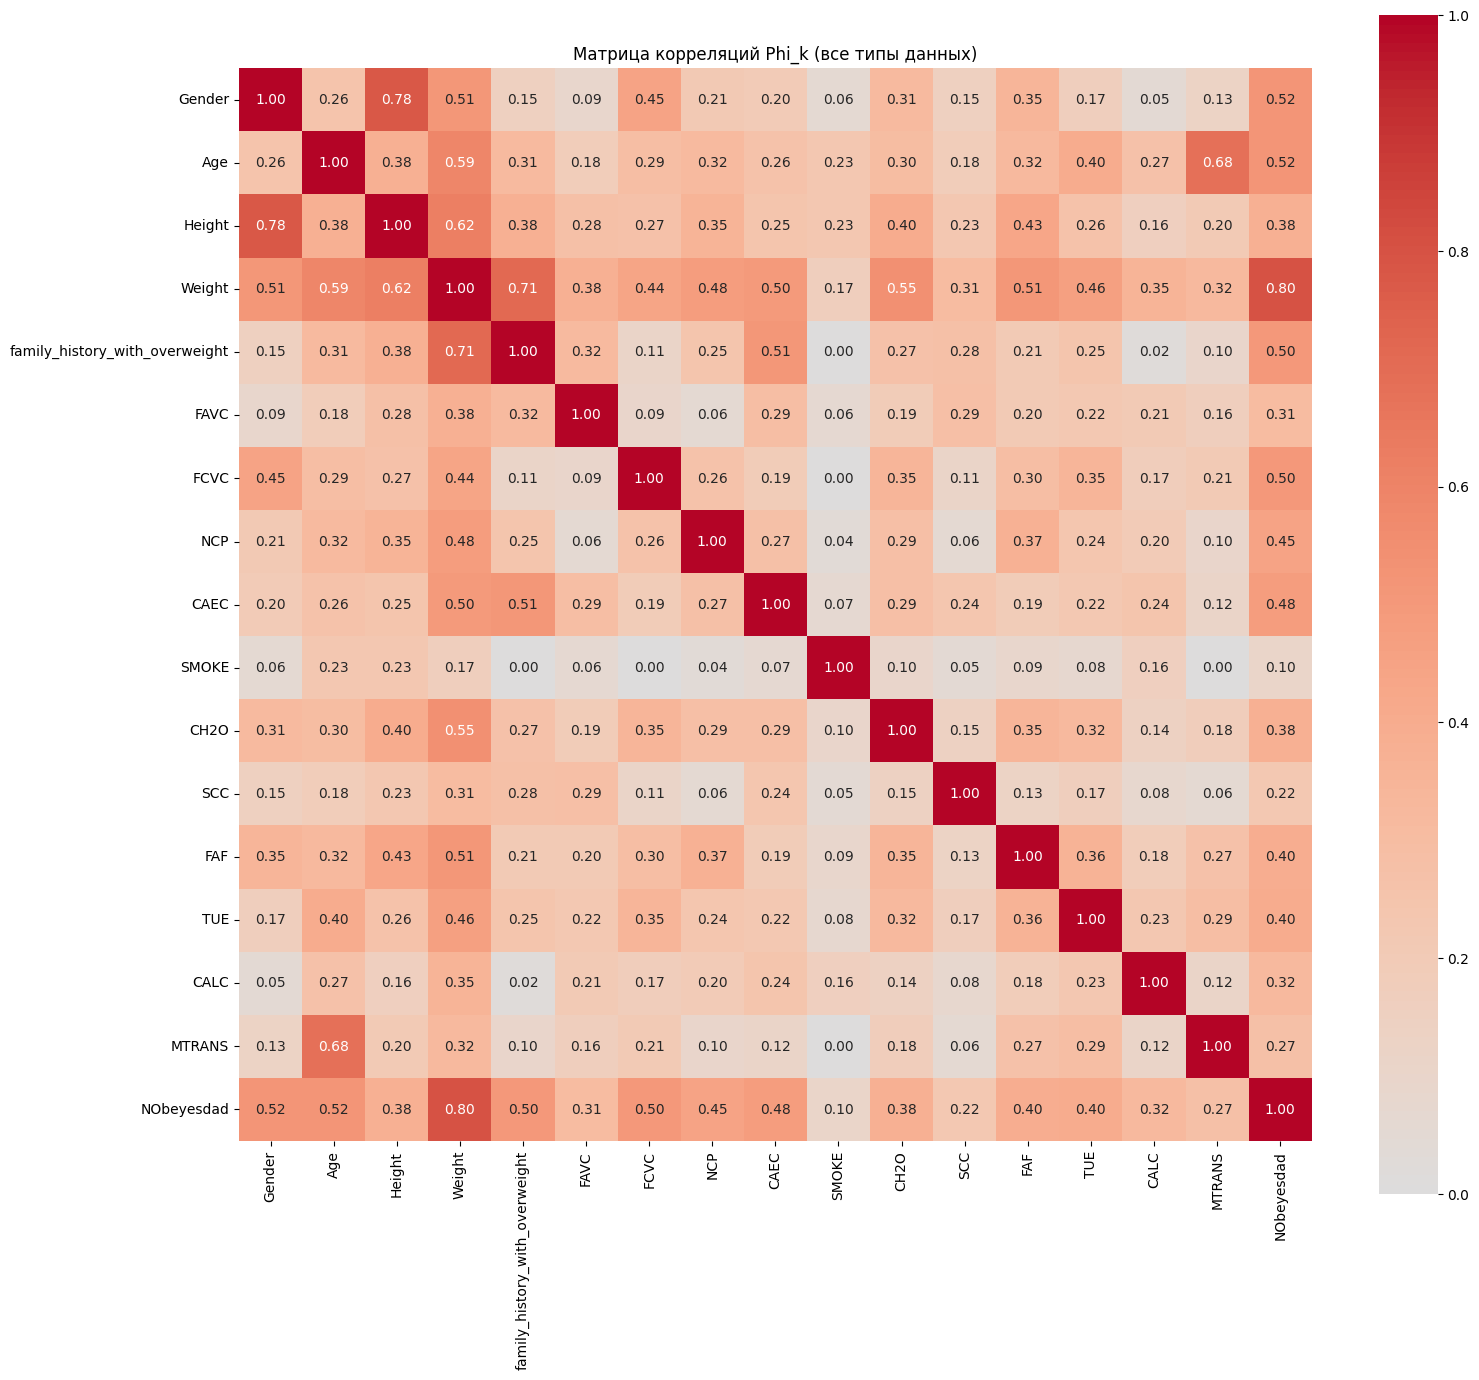


Топ-10 признаков по корреляции с целевой переменной (NObeyesdad):
NObeyesdad                        1.000000
Weight                            0.800667
Age                               0.520337
Gender                            0.518295
family_history_with_overweight    0.504056
FCVC                              0.500755
CAEC                              0.482745
NCP                               0.446700
TUE                               0.402407
FAF                               0.395364
Name: NObeyesdad, dtype: float64


In [9]:
# Расчет матрицы Phi_k корреляций
print("Расчет матрицы Phi_k...")
phik_matrix = df.phik_matrix()

# Визуализация матрицы Phi_k
plt.figure(figsize=(16, 14))
sns.heatmap(phik_matrix, 
           annot=True, 
           cmap='coolwarm', 
           center=0, 
           fmt='.2f',
           square=True)
plt.title('Матрица корреляций Phi_k (все типы данных)')
plt.tight_layout()
plt.show()

# Анализ корреляций с целевой переменной
target_correlations = phik_matrix['NObeyesdad'].sort_values(ascending=False)
print("\nТоп-10 признаков по корреляции с целевой переменной (NObeyesdad):")
print(target_correlations.head(10))